# Bio-Signal Analysis for Smoking Prediction


### Problem Statement:

The goal is to develop a robust machine learning model that can accurately predict an individual's smoking status (smoker/non-smoker) based on a set of bio-signals and personal characteristics.

### Target Variable:
The target variable is "smoking." It's a binary variable where 1 indicates the presence of smoking, and 0 indicates the absence of smoking.

### Independent Variables:

1. **ID**: Index or identifier for each individual.
2. **gender**: The gender of the individual.
3. **age**: Age of the individual, typically categorized in 5-year gaps.
4. **height (cm)**: The height of the individual in centimeters.
5. **weight (kg)**: The weight of the individual in kilograms.
6. **waist (cm)**: Waist circumference length, a measure of waist size.
7. **eyesight (left)**: Measurement of eyesight in the left eye.
8. **eyesight (right)**: Measurement of eyesight in the right eye.
9. **hearing (left)**: Measurement of hearing ability in the left ear.
10. **hearing (right)**: Measurement of hearing ability in the right ear.
11. **systolic**: Blood pressure measurement, often representing the systolic value.
12. **relaxation**: Blood pressure measurement, often representing the diastolic (relaxation) value.
13. **fasting blood sugar**: Measurement of fasting blood sugar levels.
14. **Cholesterol (total)**: The total cholesterol level in the blood.
15. **triglyceride**: The level of triglycerides in the blood, a type of fat.
16. **HDL (High-Density Lipoprotein)**: Measurement of high-density lipoprotein cholesterol, often considered "good" cholesterol.
17. **LDL (Low-Density Lipoprotein)**: Measurement of low-density lipoprotein cholesterol, often considered "bad" cholesterol.
18. **hemoglobin**: A measure of hemoglobin levels in the blood, responsible for oxygen transport.
19. **Urine protein**: Presence or quantity of protein in the urine, which can indicate kidney issues.
20. **serum creatinine**: A measure of creatinine in the blood, used to assess kidney function.
21. **AST (Aspartate Aminotransferase)**: An enzyme found in the liver and other tissues, often used to assess liver health.
22. **ALT (Alanine Aminotransferase)**: Another liver enzyme, used to assess liver health.
23. **Gtp (γ-GTP)**: Measurement of gamma-glutamyl transferase, an enzyme found in the liver and bile ducts.
24. **oral**: Status of oral examination
25. **dental caries**: Presence of dental caries, indicating tooth decay or cavities.
26. **tartar**: Status of tartar, which represents hardened plaque on the teeth.

These features encompass a wide range of health-related and demographic information, which can be used to analyze various aspects of an individual's health and lifestyle.

### Objectives:

1. Conducting analysis on bio-signals
2. Identifying smoking patterns based on certain features: based on the provided data, such as age, gender, and health indicators
3. Assesing health indicators : Evaluate the impact of smoking on various health indicators, such as hemoglobin, gender, and age, to better understand its health consequences
4. Identinfying key health indicators affected when a person is a smoker

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Loading the dataset

In [49]:
smoke = pd.read_csv("smoking.csv")
smoke.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


## Data pre-processing

Shape of the dataset

In [35]:
smoke.shape

(55692, 27)

### Dropping 'id','oral' column and target column 'smoking'. oral has only one value, so it is not relevant.

In [4]:
df = smoke.drop(columns=['ID','oral','smoking'], axis=1)
df.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar
0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,73.0,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,Y
1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,42.0,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,Y
2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,55.0,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,N
3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,45.0,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,Y
4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,62.0,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,N


In [6]:
df.columns

Index(['gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'tartar'],
      dtype='object')

## Renaming column names:

In [5]:
df.rename(columns = {"height(cm)" : "height_cm", "weight(kg)" : "weight_kg",
                     "waist(cm)" : "waist_cm", "eyesight(left)" : "eyesight_left",
                     "eyesight(right)" : "eyesight_right", "hearing(left)" : "hearing_left",
                     "hearing(right)" : "hearing_right", "fasting blood sugar" : "fasting_blood_sugar",
                     "Cholesterol" : "cholesterol", "HDL" : "hdl", "LDL" : "ldl",
                     "Urine protein" : "urine_protein", "serum creatinine" : "serum_creatinine",
                     "AST" : "ast", "ALT" : "alt", "Gtp" : "gtp", "dental caries" : "dental_caries"},
          inplace = True)

In [6]:
df.head()

,gender,age,height_cm,weight_kg,waist_cm,eyesight_left,eyesight_right,hearing_left,hearing_right,systolic,...,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,dental_caries,tartar
0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,73.0,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,Y
1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,42.0,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,Y
2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,55.0,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,N
3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,45.0,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,Y
4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,62.0,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,N


## Checking for null values:

In [9]:
missing_values = df.isnull().sum()
print(sum(missing_values))

gender                 0
age                    0
height_cm              0
weight_kg              0
waist_cm               0
eyesight_left          0
eyesight_right         0
hearing_left           0
hearing_right          0
systolic               0
relaxation             0
fasting_blood_sugar    0
cholesterol            0
triglyceride           0
hdl                    0
ldl                    0
hemoglobin             0
urine_protein          0
serum_creatinine       0
ast                    0
alt                    0
gtp                    0
dental_caries          0
tartar                 0
dtype: int64

No missing values

## EDA: Exploratory Data Analysis

### Target Variable: smoking

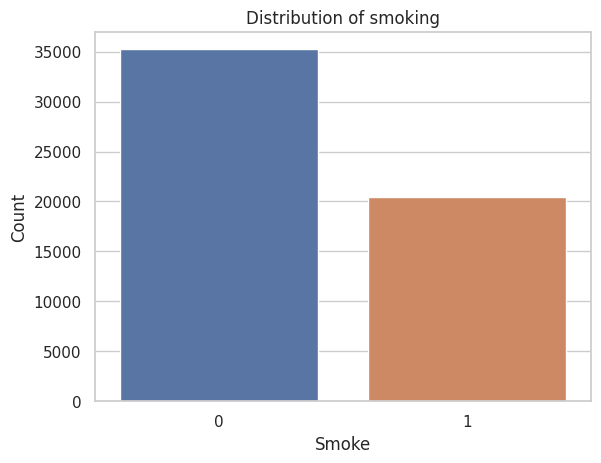

In [9]:
sns.set(style="whitegrid")
sns.countplot(data=smoke, x='smoking')

plt.xlabel('Smoke')
plt.ylabel('Count')
plt.title('Distribution of smoking')

plt.show()

Number of smokers and non-smokers in our dataset:

In [222]:
print(smoke['smoking'].value_counts())

0    35237
1    20455
Name: smoking, dtype: int64


## Independent Variables:

### Categorical features

### How does gender distribution vary in the dataset?

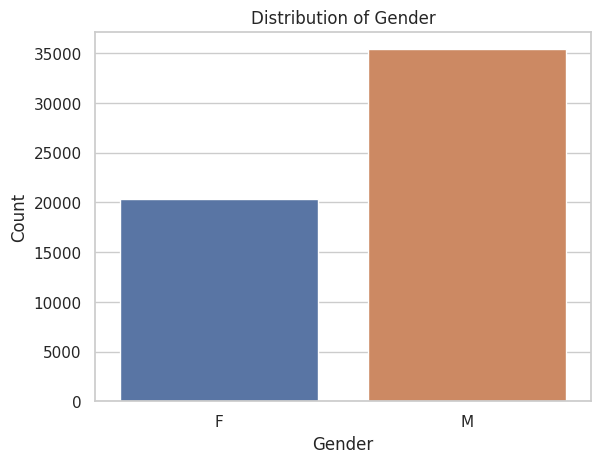

In [223]:
sns.set(style="whitegrid")
sns.countplot(data=smoke, x='gender')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')

plt.show()

We have more data on males than females.

### Dental Caries Distribution

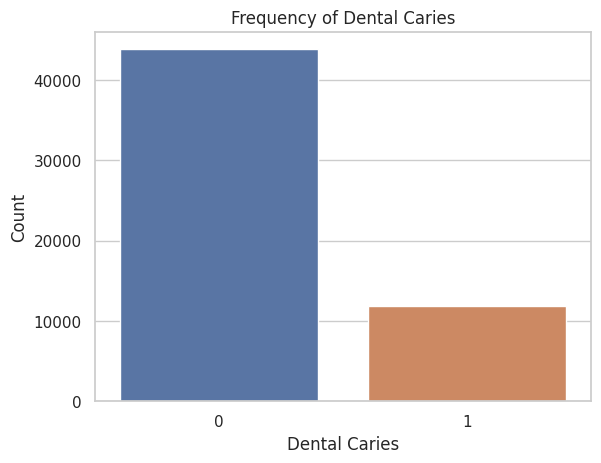

In [224]:
sns.set(style="whitegrid")
sns.countplot(data=smoke, x='dental caries')

plt.xlabel('Dental Caries')
plt.ylabel('Count')
plt.title('Frequency of Dental Caries')

plt.show()

### Tartar Distribution

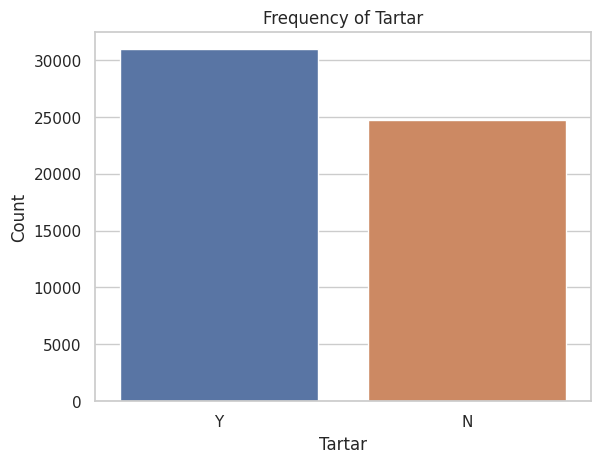

In [225]:
sns.set(style="whitegrid")
sns.countplot(data=smoke, x='tartar')

plt.xlabel('Tartar')
plt.ylabel('Count')
plt.title('Frequency of Tartar')

plt.show()

### Distribution plot of all the numerical features of the dataset:

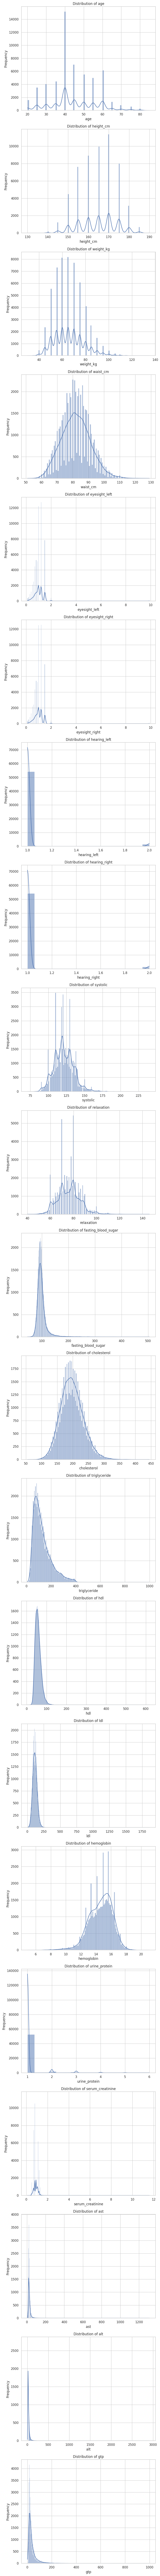

In [226]:
numeric_columns = df.select_dtypes(include='number').drop(columns=['dental_caries'], axis=1)

sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=len(numeric_columns.columns), ncols=1, figsize=(8, 6 * len(numeric_columns.columns)))

for i, col in enumerate(numeric_columns.columns):
    sns.histplot(data=numeric_columns, x=col, kde=True, ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


### What is the distribution of age among individuals who smoke and those who do not smoke?

<Figure size 1000x600 with 0 Axes>

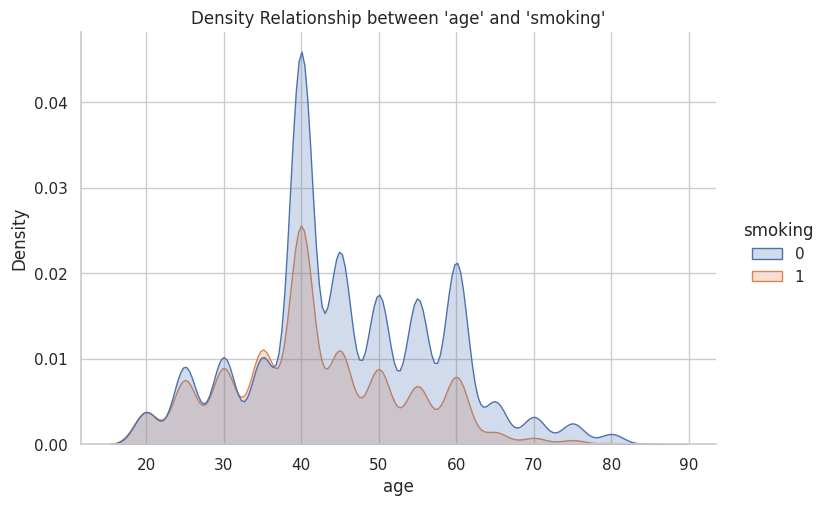

In [227]:
plt.figure(figsize=(10, 6))

sns.displot(data=smoke, x="age", hue="smoking", kind="kde", height=5, aspect=1.5, fill=True)

plt.title("Density Relationship between 'age' and 'smoking'")

plt.show()


Observation: People smoke less as their age increases.

### Smoking Vs Waist

Mean Waist Size for Smokers: 84.80 cm
Mean Waist Size for Non-Smokers: 80.45 cm


<Figure size 1000x600 with 0 Axes>

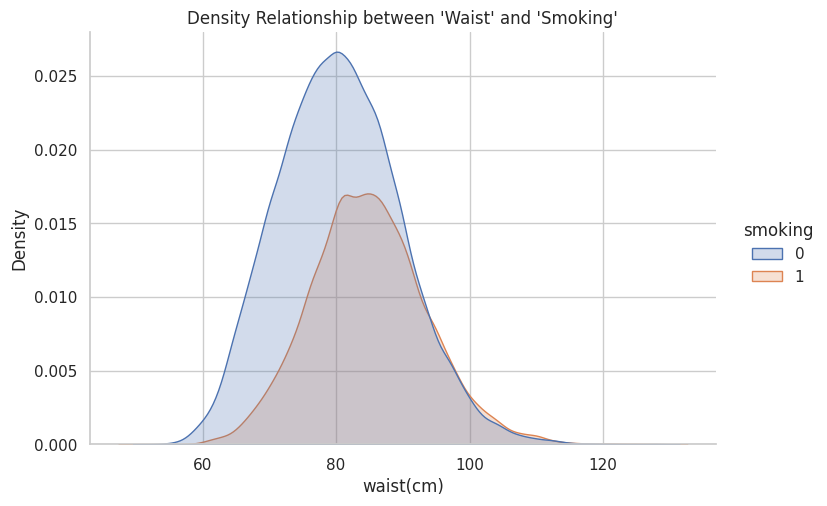

In [228]:
plt.figure(figsize=(10, 6))
sns.displot(data=smoke, x="waist(cm)", hue="smoking", kind="kde", height=5, aspect=1.5, fill=True)

mean_waist_smokers = smoke[smoke['smoking'] == 1]['waist(cm)'].mean()
mean_waist_non_smokers = smoke[smoke['smoking'] == 0]['waist(cm)'].mean()

print(f"Mean Waist Size for Smokers: {mean_waist_smokers:.2f} cm")
print(f"Mean Waist Size for Non-Smokers: {mean_waist_non_smokers:.2f} cm")

plt.title("Density Relationship between 'Waist' and 'Smoking'")

plt.show()


Observation: Average waist size of a smoker is more than a non-smoker

### Smoking Vs Gender

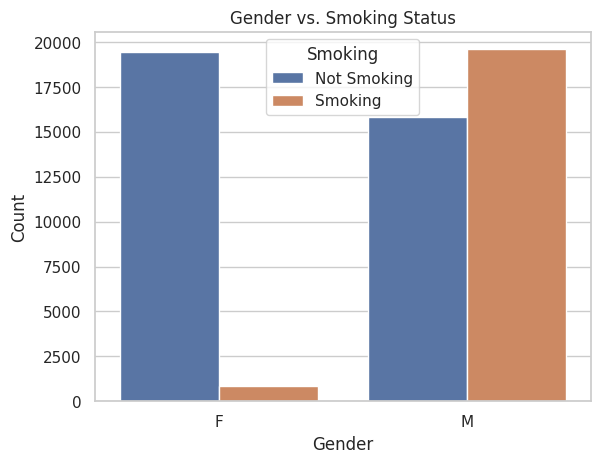

In [229]:
plot = sns.countplot(data=smoke, x='gender', hue='smoking')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender vs. Smoking Status')

plt.legend(title='Smoking', labels=['Not Smoking', 'Smoking'])

plt.show()

Observation: Males smokers are significantly more

### Triglyceride Levels by Gender and Smoking

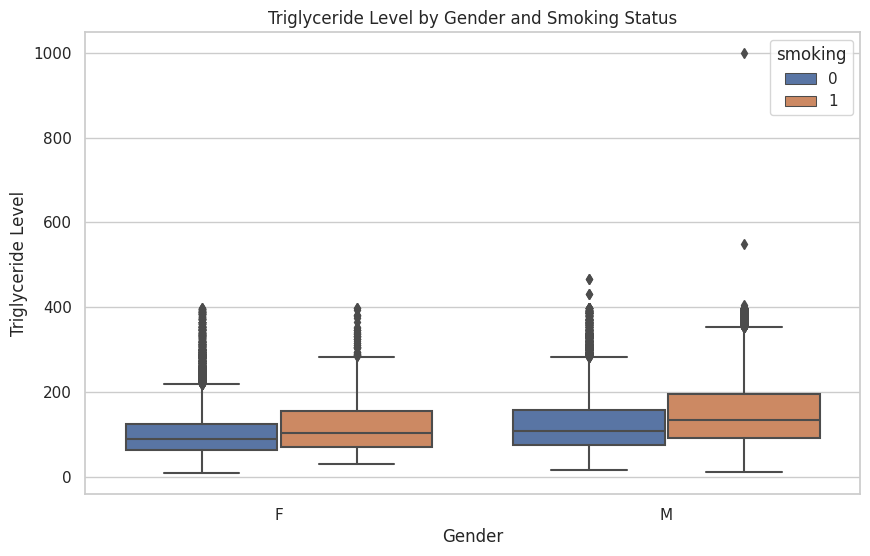

In [230]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=smoke, x="gender", y="triglyceride", hue="smoking")

plt.xlabel("Gender")
plt.ylabel("Triglyceride Level")
plt.title("Triglyceride Level by Gender and Smoking Status")

plt.show()


Observation: Average Triglyceride levels seems to be higher in smokers as compared to non-smokers.

### Is there a significant difference in the distribution of hemoglobin levels between different age groups?

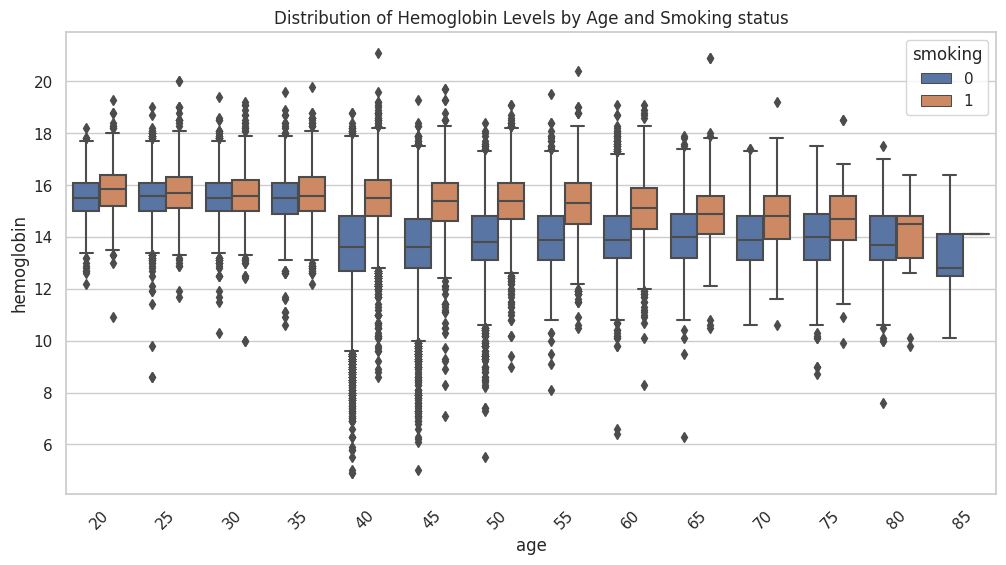

In [231]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='age', y='hemoglobin', hue='smoking', data=smoke)
plt.title('Distribution of Hemoglobin Levels by Age and Smoking status')
plt.xticks(rotation=45)
plt.show()


Observation: Hemoglobin levels are notably higher in individuals who smoke. This increase among smokers may be a compensatory response to address a potential reduction in oxygen-carrying capacity.

### Correlation Matrix

<ipython-input-232-e7f5833089b4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = smoke.corr()


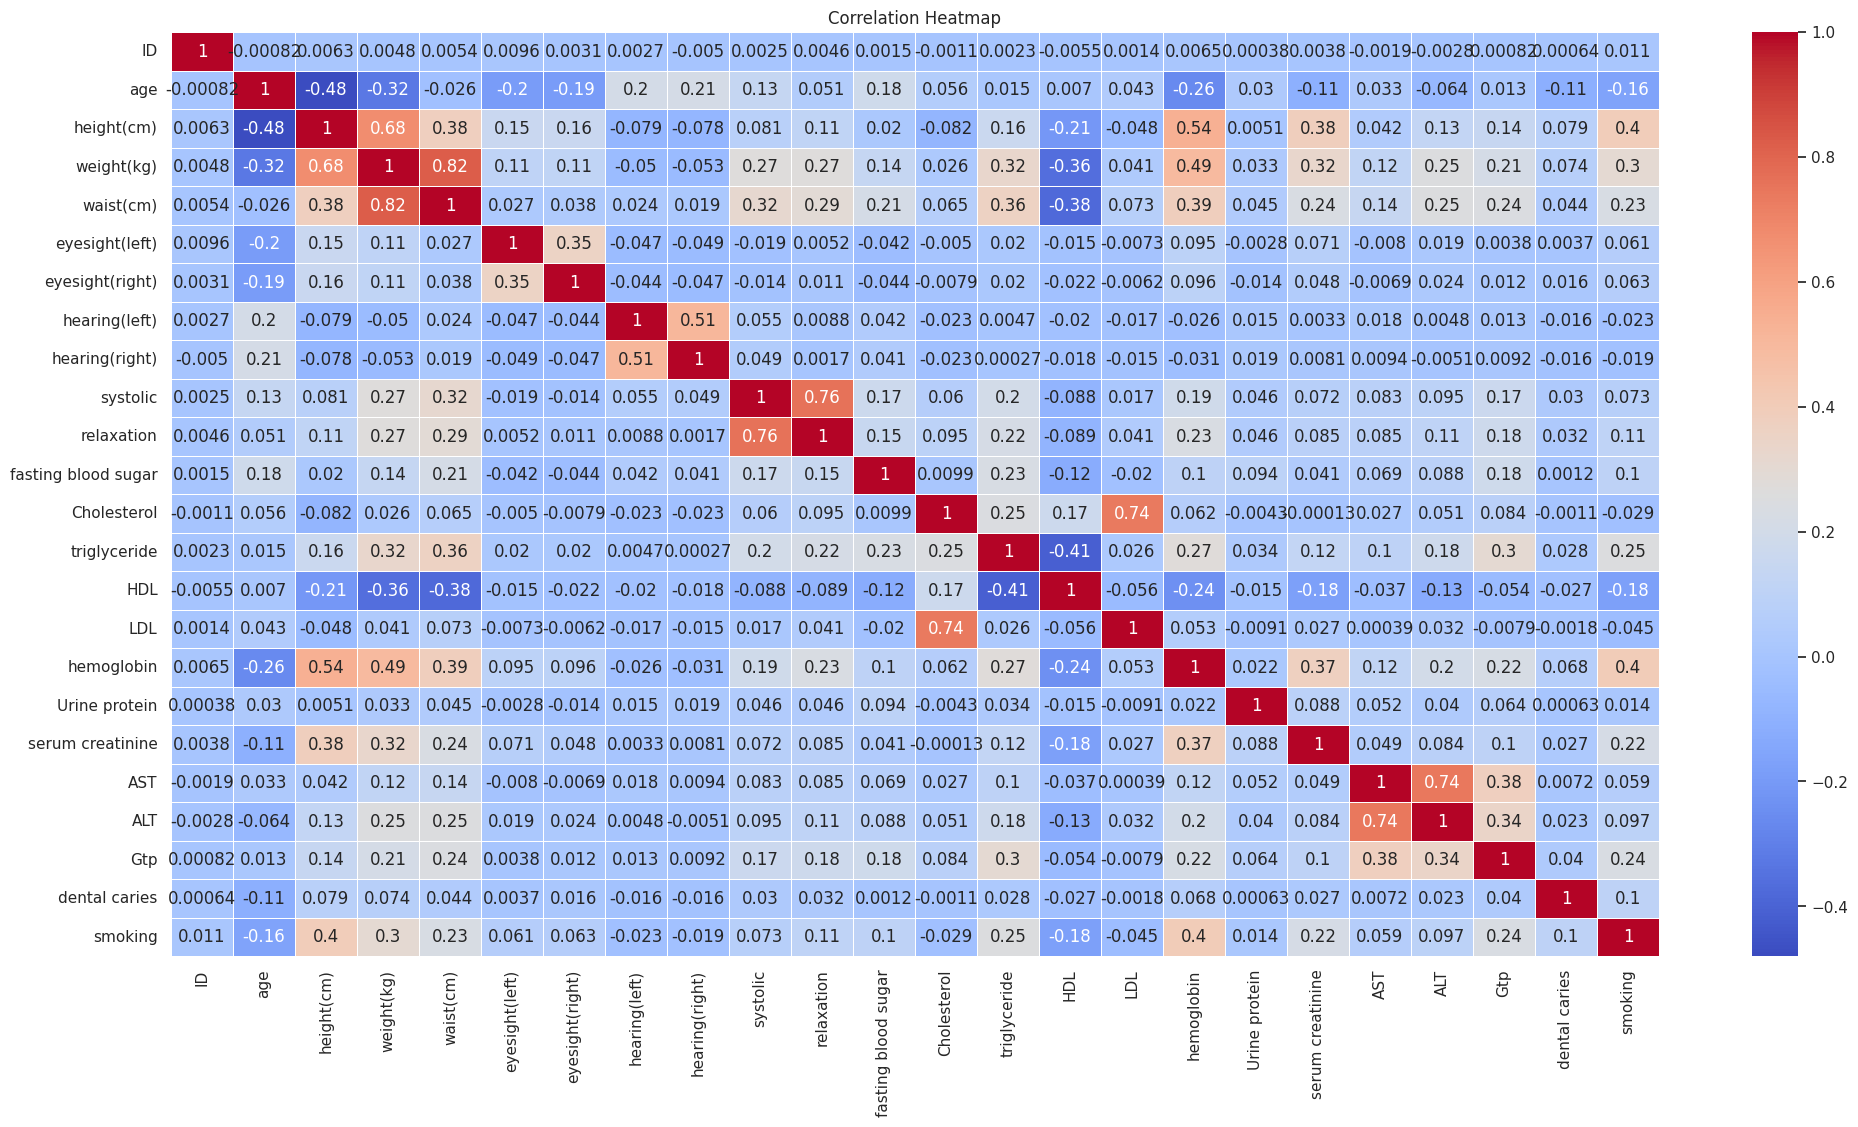

In [232]:
correlation_matrix = smoke.corr()

plt.figure(figsize=(24, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

plt.title("Correlation Heatmap")

plt.show()


Observation:

1. LDL and Cholesterol are highly correlated, so creating a new feature that calculates the mean of both.
2. Relaxation and Systolic are also highly correlated, so creating a new feature that calculates the mean of both.

## Outlier Detection

In [7]:
from collections import Counter

def outlier_detection(df, n, columns):
    rows = []
    will_drop_train = []
    for col in columns:
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_point = 1.5 * IQR
        rows.extend(df[(df[col] < Q1 - outlier_point) | (df[col] > Q3 + outlier_point)].index)
    for r, c in Counter(rows).items():
        if c >= n:
            will_drop_train.append(r)
    return will_drop_train

will_drop_train = outlier_detection(df, 5, df.select_dtypes(["float", "int"]).columns)
print(will_drop_train)


[44, 3368, 3592, 4171, 4738, 5450, 9900, 10256, 11263, 11447, 12468, 15751, 18596, 18903, 21242, 24054, 24347, 26913, 27274, 30443, 30818, 31773, 37382, 40122, 43257, 46804, 46925, 962, 8493, 17053, 18651, 27684, 34071, 40181, 43387, 54221, 1959, 2249, 2689, 4130, 4913, 5016, 6205, 7195, 11501, 14390, 15367, 15402, 18738, 19494, 20916, 21056, 21369, 22125, 23233, 23575, 24307, 24706, 25092, 25173, 25872, 26315, 27891, 27944, 28069, 29620, 29691, 29717, 30084, 32208, 32973, 33057, 33358, 34387, 34553, 35048, 35525, 36842, 39277, 39589, 40004, 40629, 42463, 42470, 46970, 48004, 49495, 49753, 51160, 53001, 53035, 54115, 323, 3305, 4053, 5790, 6348, 6471, 8143, 8438, 8937, 9399, 10007, 10671, 12278, 14400, 14704, 16013, 16727, 16924, 17620, 18593, 19481, 20744, 22550, 22810, 24261, 26477, 26543, 27415, 29899, 31672, 32116, 33091, 34301, 35839, 36411, 36720, 36906, 37200, 40391, 40584, 41488, 41780, 43425, 44590, 46521, 48232, 48774, 49931, 50171, 50235, 50828, 50918, 51934, 52536, 53625, 5

In [8]:
len(will_drop_train)

616

## Dropping outliers

In [10]:
# df.drop(will_drop_train, inplace=True,axis=0)
# smoke.drop(will_drop_train, inplace=True,axis=0)

### Shape of the dataset after dropping outliers:

In [11]:
df.shape

(55076, 24)

## Encoding categorical features

In [12]:
categorical_cols = ['gender','tartar']

df_encoded = pd.get_dummies(df, columns=categorical_cols)
df_encoded.head()

,age,height_cm,weight_kg,waist_cm,eyesight_left,eyesight_right,hearing_left,hearing_right,systolic,relaxation,...,urine_protein,serum_creatinine,ast,alt,gtp,dental_caries,gender_F,gender_M,tartar_N,tartar_Y
0,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,73.0,...,1.0,0.7,18.0,19.0,27.0,0,1,0,0,1
1,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,70.0,...,1.0,0.6,22.0,19.0,18.0,0,1,0,0,1
2,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,86.0,...,1.0,1.0,21.0,16.0,22.0,0,0,1,1,0
3,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,60.0,...,1.0,1.0,19.0,26.0,18.0,0,0,1,0,1
4,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,74.0,...,1.0,0.6,16.0,14.0,22.0,0,1,0,1,0


In [13]:
df_encoded.dtypes

age                      int64
height_cm                int64
weight_kg                int64
waist_cm               float64
eyesight_left          float64
eyesight_right         float64
hearing_left           float64
hearing_right          float64
systolic               float64
relaxation             float64
fasting_blood_sugar    float64
cholesterol            float64
triglyceride           float64
hdl                    float64
ldl                    float64
hemoglobin             float64
urine_protein          float64
serum_creatinine       float64
ast                    float64
alt                    float64
gtp                    float64
dental_caries            int64
gender_F                 uint8
gender_M                 uint8
tartar_N                 uint8
tartar_Y                 uint8
dtype: object

# Feature Engineering

### Creating new features to reduce the number of columns and combining features that are very highly correlated to each other.

In [14]:
df_encoded['average_eyesight'] = (df_encoded['eyesight_left'] + df_encoded['eyesight_right']) / 2

In [15]:
df_encoded['average_hearing'] = (df_encoded['hearing_left'] + df_encoded['hearing_right']) / 2

In [16]:
df_encoded['dental_health'] = df_encoded['dental_caries'] + df_encoded['tartar_N']+ df_encoded['tartar_Y']

In [17]:
df_encoded['cholesterol_ldl_mean'] = (df_encoded['cholesterol'] + df_encoded['ldl']) / 2

In [18]:
df_encoded['mean_blood_pressure'] = (df_encoded['relaxation'] + df_encoded['systolic']) / 2

In [19]:
df_new = df_encoded.drop(columns=['eyesight_left','eyesight_right','hearing_left','hearing_right','dental_caries','tartar_N','tartar_Y','cholesterol','ldl','relaxation','systolic'], axis=1)

In [20]:
df_new.head()

,age,height_cm,weight_kg,waist_cm,fasting_blood_sugar,triglyceride,hdl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,gender_F,gender_M,average_eyesight,average_hearing,dental_health,cholesterol_ldl_mean,mean_blood_pressure
0,40,155,60,81.3,94.0,82.0,73.0,12.9,1.0,0.7,18.0,19.0,27.0,1,0,1.1,1.0,1,170.5,93.5
1,40,160,60,81.0,130.0,115.0,42.0,12.7,1.0,0.6,22.0,19.0,18.0,1,0,0.7,1.0,1,159.5,94.5
2,55,170,60,80.0,89.0,182.0,55.0,15.8,1.0,1.0,21.0,16.0,22.0,0,1,0.8,1.0,1,196.5,112.0
3,40,165,70,88.0,96.0,254.0,45.0,14.7,1.0,1.0,19.0,26.0,18.0,0,1,1.5,1.0,1,274.0,80.0
4,40,155,60,86.0,80.0,74.0,62.0,12.5,1.0,0.6,16.0,14.0,22.0,1,0,1.0,1.0,1,145.5,97.0


## Feature Importance Analysis: Implemented using random forest classifier

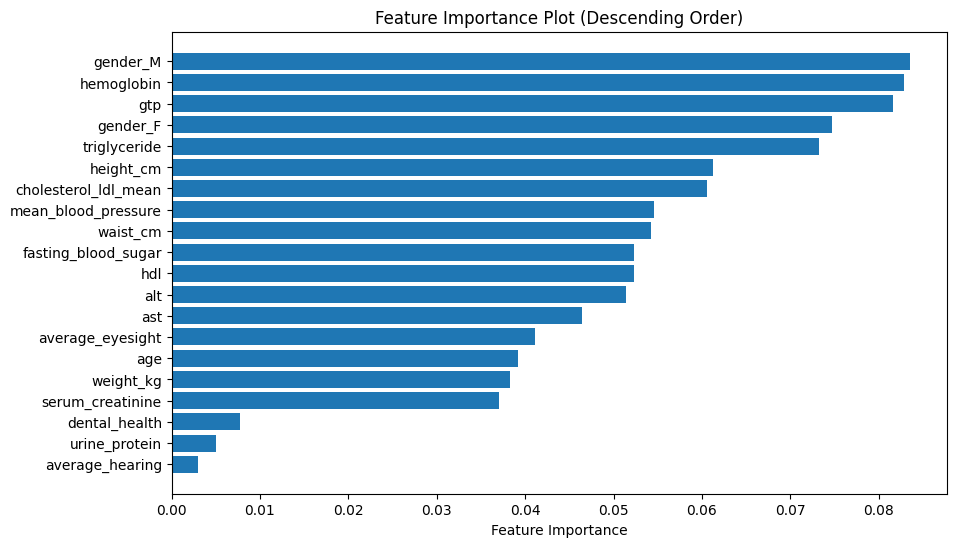

In [23]:
from sklearn.ensemble import RandomForestClassifier

X = df_new
y = smoke['smoking']

#fitting the model for feature importance analysis
model = RandomForestClassifier()
model.fit(X, y)

importances = model.feature_importances_

feature_names = X.columns

#storing it in a dataframe
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

#plotting the results
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance_df)), feature_importance_df['Importance'], align='center')
plt.yticks(range(len(feature_importance_df)), feature_importance_df['Feature'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance Plot (Descending Order)')
plt.gca().invert_yaxis()
plt.show()


In [24]:
df_new.dtypes

age                       int64
height_cm                 int64
weight_kg                 int64
waist_cm                float64
fasting_blood_sugar     float64
triglyceride            float64
hdl                     float64
hemoglobin              float64
urine_protein           float64
serum_creatinine        float64
ast                     float64
alt                     float64
gtp                     float64
gender_F                  uint8
gender_M                  uint8
average_eyesight        float64
average_hearing         float64
dental_health             int64
cholesterol_ldl_mean    float64
mean_blood_pressure     float64
dtype: object

# Scaling the dataset

In [21]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


features_to_scale = ['age', 'height_cm', 'weight_kg', 'waist_cm', 'fasting_blood_sugar', 'triglyceride', 'hdl', 'hemoglobin',
                      'urine_protein', 'serum_creatinine', 'ast', 'alt', 'gtp', 'average_eyesight', 'average_hearing',
                      'dental_health', 'cholesterol_ldl_mean', 'mean_blood_pressure']

#Using Standard Scaler
scaler = StandardScaler()

df_new[features_to_scale] = scaler.fit_transform(df_new[features_to_scale])
df_new.head()

,age,height_cm,weight_kg,waist_cm,fasting_blood_sugar,triglyceride,hdl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,gender_F,gender_M,average_eyesight,average_hearing,dental_health,cholesterol_ldl_mean,mean_blood_pressure
0,-0.344847,-1.048314,-0.452484,-0.068258,-0.246415,-0.618336,1.066699,-1.099407,-0.209287,-0.837749,-0.437275,-0.263860,-0.252364,1,0,0.225631,-0.182115,-0.515666,0.412785,-0.472145
1,-0.344847,-0.504078,-0.452484,-0.100982,1.536245,-0.151216,-1.042603,-1.227721,-0.209287,-1.290384,-0.211827,-0.263860,-0.448376,1,0,-0.782755,-0.182115,-0.515666,0.103904,-0.379643
2,0.900991,0.584395,-0.452484,-0.210062,-0.494006,0.797178,-0.158057,0.761150,-0.209287,0.520158,-0.268189,-0.370689,-0.361260,0,1,-0.530659,-0.182115,-0.515666,1.142869,1.239141
3,-0.344847,0.040159,0.336805,0.662577,-0.147378,1.816348,-0.838477,0.055422,-0.209287,0.520158,-0.380913,-0.014593,-0.448376,0,1,1.234017,-0.182115,-0.515666,3.319080,-1.720922
4,-0.344847,-1.048314,-0.452484,0.444417,-0.939671,-0.731577,0.318237,-1.356035,-0.209287,-1.290384,-0.549998,-0.441908,-0.361260,1,0,-0.026466,-0.182115,-0.515666,-0.289218,-0.148388


# Train-Test Split

In [22]:
X = df_new
y = smoke['smoking']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the model

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

## Baseline model:  
- No hyper parameter tuning
- Implemented Cross validation to fit the models

In [26]:
#defining the models
models = {
    'Logistic Regression': (LogisticRegression(), {}),
    'SVM': (SVC(), {}),
    'Random Forest': (RandomForestClassifier(), {})
}

#to store values
accuracies = {}
reports = {}

#Loop through the models, perform Grid Search with default hyperparameters, and evaluate each model
for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train, y_train)


    best_model = grid_search.best_estimator_

    # Make predictions
    y_pred = best_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Store results
    accuracies[model_name] = accuracy
    reports[model_name] = report

# Display the results for each model
for model_name in models.keys():
    print(f"{model_name} Model:")
    print(f"Accuracy: {accuracies[model_name]:.2f}")
    print(reports[model_name])


Logistic Regression Model:
Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.80      0.79      0.80      6861
           1       0.66      0.68      0.67      4155

    accuracy                           0.75     11016
   macro avg       0.73      0.73      0.73     11016
weighted avg       0.75      0.75      0.75     11016

SVM Model:
Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.82      0.79      0.81      6861
           1       0.68      0.72      0.70      4155

    accuracy                           0.76     11016
   macro avg       0.75      0.75      0.75     11016
weighted avg       0.77      0.76      0.76     11016

Random Forest Model:
Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      6861
           1       0.77      0.79      0.78      4155

    accuracy                           0.83     11016
   macro avg       0.82 

In [47]:
# Initialize a Random Forest Classifier model
rf_model = RandomForestClassifier()

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [200],
    'max_depth': [30, 40]
    # 'min_samples_split': [50, 70, 90]
}

# Initialize Grid Search
grid_search = GridSearchCV(rf_model, param_grid, cv=None)

# Fit the model to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best model with optimized hyperparameters
best_rf_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

# Display the results for the best Random Forest model
print("Random Forest Classifier (Hyperparameter Tuned):")
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy_rf:.2f}")
print(report_rf)

Random Forest Classifier (Hyperparameter Tuned):
Best Hyperparameters: {'max_depth': 30, 'n_estimators': 200}
Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      6861
           1       0.77      0.80      0.79      4155

    accuracy                           0.84     11016
   macro avg       0.83      0.83      0.83     11016
weighted avg       0.84      0.84      0.84     11016



## Conclusion:

Random Forest Classifier performs better than the baseline model : Logistic Regression, SVMs.

Accuracy: 84% to predict whether a person smokes or not based on their bio-signals


Key Findings:

1. Hemoglobin levels are high in smokers
2. Smoking is more prevalent among younger individuals
3. The male population has a higher representation among smokers compared to females as per the dataset
4. Triglyceride levels seems to be higher in smokers as compared to non-smokers


### Challenges faced:
Hyperparameter tuning with cross validation took a long time to execute, due to which I implemented tuning with very few parameters. That resulted in improvement of the model by 1%
